In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# チャートを日本語で表示
import japanize_matplotlib


In [14]:
df = pd.read_csv('doraeiga.csv')
df.head()

,タイトル,配給収入,観客動員数,年度
0,のび太の恐竜,15.5,320.0,1980
1,のび太の宇宙開拓史,17.5,360.0,1981
2,のび太の大魔境,12.2,250.0,1982
3,のび太の海底鬼岩城,10.0,210.0,1983
4,のび太の魔界大冒険,16.5,330.0,1984


/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21454 (\N{CJK UNIFIED IDEOGRAPH-53CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:15

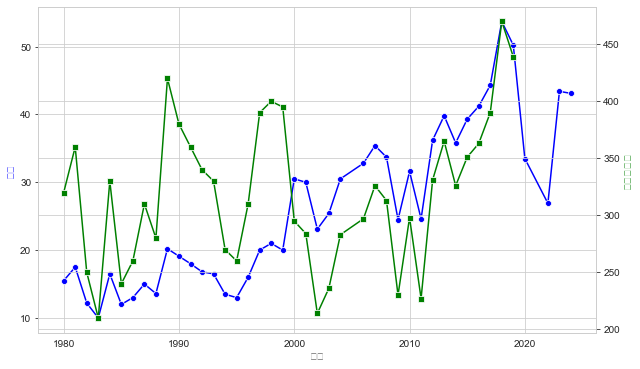

In [15]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the primary y-axis data
sns.lineplot(data=df, x="年度", y="配給収入", ax=ax1, color="blue", marker="o")

# Create the secondary y-axis
ax2 = ax1.twinx()
sns.lineplot(data=df, x="年度", y="観客動員数", ax=ax2, color="green", marker="s")
ax1.set_ylabel('収入', color='blue')
ax2.set_ylabel('観客動員数', color='green')
plt.show()

In [16]:
!pip install japanize_matplotlib


[notice] A new release of pip is available: 23.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12489 (\N{KATAKANA LETTER DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12521 (\N{KATAKANA LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/takamirei/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: 

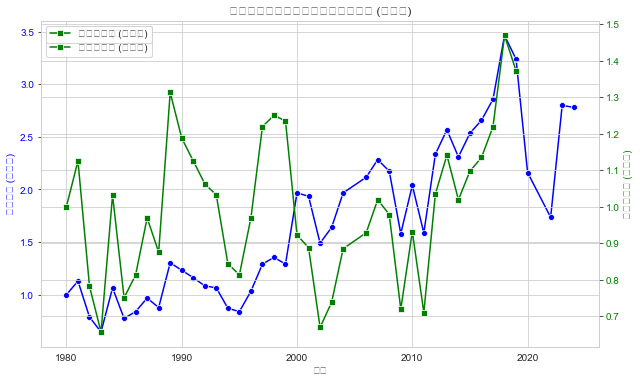

In [17]:
# 正規化
df["配給収入_norm"] = df["配給収入"] / df["配給収入"].iloc[0]
df["観客動員数_norm"] = df["観客動員数"] / df["観客動員数"].iloc[0]

# プロット
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(10, 6))

# 収入の描画 (青色軸)
sns.lineplot(data=df, x="年度", y="配給収入_norm", ax=ax1, color="blue", marker="o", label="配給収入 (正規化)")
ax1.set_ylabel("配給収入 (正規化)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# 観客動員数の描画 (緑色軸)
ax2 = ax1.twinx()
sns.lineplot(data=df, x="年度", y="観客動員数_norm", ax=ax2, color="green", marker="s", label="観客動員数 (正規化)")
ax2.set_ylabel("観客動員数 (正規化)", color="green")
ax2.tick_params(axis="y", labelcolor="green")

# タイトルと凡例
ax1.set_title("ドラえもん映画の収入と観客動員数 (正規化)")
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.show()